# Buisness Objective:

# 1.Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                #library #comprehensive mathematical functions, linear algebra, array, random no etc.
import pandas as pd               #software library #it offers data structures and operations for data manipulation and analysis
import matplotlib.pyplot as plt   #plotting library #pyplot is a collection of functions that make matplotlib work like MATLAB
import seaborn as sns             #data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [3]:
#!pip install -U spacy
#!python -m spacy download en
#!pip install wordcloud
#!pip install textblob

In [4]:
# A list of English positive and negative opinion words or sentiment words taken from the following link
# https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [5]:
import spacy      
import re
import nltk
from PIL import Image
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [6]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')                             #load the language library

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer  #Convert a collection of text documents to a matrix of token counts
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [8]:
#  sklearn : machine learning library
#  feature_extraction : module can be used to extract features in a format supported by machine learning algorithms 
#                       from datasets consisting of formats such as text and image
#  Countvectorizer : it is a method to convert text to numerical data
#  spacy : software library for advanced natural language processing. It features NER, POS tagging, word vectors and more
#  re : This module provides regular expression matching operations. the functions in this module let you check if
#       a particular string matches a given regular expression

# 2. Importing Data Set

In [9]:
data = pd.read_csv("D:\\PROJECT 2\\financial_sentiment_data.csv")
data

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [10]:
#showing first five records 
data.head()

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

# 3.Data Pre-Processing/ Data Understanding

In [11]:
data.head() #first five records

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

In [12]:
data.tail() #last five Records

Sentence Sentiment
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

In [13]:
data.info() #Basic informtion about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [14]:
data.shape

(5842, 2)

In [15]:
data.isna().sum() #cheking null values

Sentence     0
Sentiment    0
dtype: int64

In [16]:
data.describe() #Describe Data

Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130

In [17]:
data.columns #columns names

Index(['Sentence', 'Sentiment'], dtype='object')

In [18]:
data.dtypes  #checking data types of columns

Sentence     object
Sentiment    object
dtype: object

In [19]:
data.groupby('Sentiment').describe()

Sentence                                                            \
             count unique                                                top   
Sentiment                                                                      
negative       860    860  $ESI on lows, down $1.50 to $2.50 BK a real po...   
neutral       3130   3124  SSH Communications Security Corporation is hea...   
positive      1852   1852  The GeoSolutions technology will leverage Bene...   

                
          freq  
Sentiment       
negative     1  
neutral      2  
positive     1

In [20]:
#checking number of characters in each sentence
data['No. of Characters'] = data['Sentence'].str.len()
data.head()

Sentence Sentiment  \
0  The GeoSolutions technology will leverage Bene...  positive   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2  For the last quarter of 2010 , Componenta 's n...  positive   
3  According to the Finnish-Russian Chamber of Co...   neutral   
4  The Swedish buyout firm has sold its remaining...   neutral   

   No. of Characters  
0                218  
1                 55  
2                193  
3                128  
4                135

In [21]:
data = data.drop('No. of Characters',axis=1)

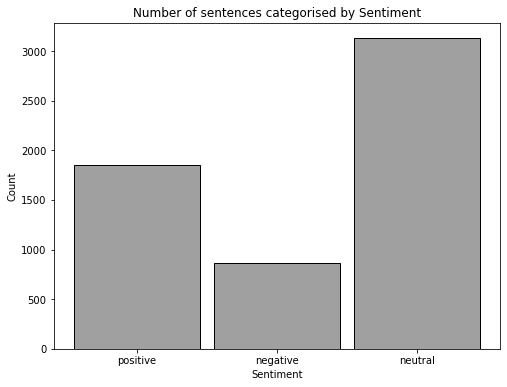

In [22]:
plt.figure(figsize = (8,6))

sns.histplot(data, x = 'Sentiment', color = 'grey', shrink = 0.9)
plt.title('Number of sentences categorised by Sentiment')

plt.show()

# Text Preprocessing

In [23]:
#Removing unwanted symbols, punctuations marks etc.

In [24]:
#creating functions to clean the Sentences

def cleansmt (smt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  smt = re.sub('RT', '', smt)                                    # remove 'RT' from sentence
  smt = re.sub('#[A-Za-z0-9]+', '', smt)                         # remove the '#' from the sentence
  smt = re.sub('\\n', '', smt)                                   # remove the '\n' character
  smt = re.sub('https?:\/\/\S+', '', smt)                        # remove the hyperlinks
  smt = re.sub('@[\S]*', '', smt)                                # remove @mentions
  smt = re.sub('^[\s]+|[\s]+$', '', smt)                         # remove leading and trailing whitespaces
  smt = re.sub(emoji, '', smt)                                   # remove emojis
  smt = re.sub("[^A-Za-z]+"," ",smt).lower()                     # converting to lower
  smt = re.sub("[0-9]+"," ",smt)

  return smt

In [25]:
#Applying the above function on Data

In [26]:
data['Sentence'] = data['Sentence'].apply(cleansmt)
data

Sentence Sentiment
0     the geosolutions technology will leverage bene...  positive
1             esi on lows down to bk a real possibility  negative
2     for the last quarter of componenta s net sales...  positive
3     according to the finnish russian chamber of co...   neutral
4     the swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  rising costs have forced packaging producer hu...  negative
5838  nordic walking was first used as a summer trai...   neutral
5839  according shipping company viking line the eu ...   neutral
5840  in the building and home improvement trade sal...   neutral
5841  helsinki afx kci konecranes said it has won an...  positive

[5842 rows x 2 columns]

In [27]:
#Creating nlp documents for the corpus "Sentence"

In [28]:
def smt (doc):
    doc = nlp(doc)
    return doc

In [29]:
#applying above function on data

In [30]:
data['Sentence'] = data["Sentence"].apply(smt)

In [31]:
data.head()

Sentence Sentiment
0  (the, geosolutions, technology, will, leverage...  positive
1  ( , esi, on, lows, down, to, bk, a, real, poss...  negative
2  (for, the, last, quarter, of, componenta, s, n...  positive
3  (according, to, the, finnish, russian, chamber...   neutral
4  (the, swedish, buyout, firm, has, sold, its, r...   neutral

# Lemmatization

In [32]:
for i in range (0,5842):
    for token in data['Sentence'][i]:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')
    print("\n")

the          DET    the
geosolutions NOUN   geosolution
technology   NOUN   technology
will         AUX    will
leverage     VERB   leverage
benefon      PROPN  benefon
s            PROPN  s
gps          NOUN   gps
solutions    NOUN   solution
by           ADP    by
providing    VERB   provide
location     NOUN   location
based        VERB   base
search       NOUN   search
technology   NOUN   technology
a            DET    a
communities  NOUN   community
platform     NOUN   platform
location     NOUN   location
relevant     ADJ    relevant
multimedia   NOUN   multimedia
content      NOUN   content
and          CCONJ  and
a            DET    a
new          ADJ    new
and          CCONJ  and
powerful     ADJ    powerful
commercial   ADJ    commercial
model        NOUN   model


             SPACE   
esi          NOUN   esi
on           ADP    on
lows         NOUN   low
down         ADP    down
to           AUX    to
bk           VERB   bk
a            DET    a
real         ADJ    real
po

In [33]:
#dataset after lemmatization

lemm_lst=[]
for i in range (0,5842) :
    for token in data['Sentence'][i]:
        lemm_lst.append(token.lemma_)
    lemm_lst.append('..')                                            #making unique identification after end of each sentence

lemm_smt_words = ' '.join(str(e) for e in lemm_lst)                              #joining all lemmatised sentence words
lemm_smt_lst = lemm_smt_words.split("..")                                    #making list of statement after lemmatization
lemm_smt_lst.pop()                                                           #deleting the last element ".."

data['Sentence'] = lemm_smt_lst
data.head()

Sentence Sentiment
0  the geosolution technology will leverage benef...  positive
1          esi on low down to bk a real possibility   negative
2   for the last quarter of componenta s net sale...  positive
3   accord to the finnish russian chamber of comm...   neutral
4   the swedish buyout firm have sell its remain ...   neutral

In [34]:
#spelling correction

In [35]:
#data['Sentence'][:100].apply(lambda x: str(TextBlob(x).correct()))               #taking too much time
#data.head()

In [36]:
#droping empty rows

In [37]:
data.drop(data[data['Sentence'] == ''].index, inplace = True)
data.reset_index(drop=True, inplace=True)

In [38]:
#findings duplicates

In [39]:
data[data.duplicated()].shape                       #checking no. of duplicate records

(64, 2)

In [40]:
data[data.duplicated()]                             #finding particular duplicate records 

Sentence Sentiment
738    operating profit rise to eur mn from eur mn i...  positive
1579   earning per share eps amount to eur up from t...  positive
1775   the share capital of alma medium corporation ...   neutral
1780            the value of the order be about eur mn    neutral
1825   proha plc euronext announce today may that it...   neutral
...                                                 ...       ...
5634   net sale decrease to eur mn from eur mn in th...  negative
5700   starbuck digital strategy to drive significan...  positive
5751   earning per share ep in decrease to eur from ...  negative
5755   net sale decrease to eur mn from eur mn in th...   neutral
5832    operating profit fall to eur mn from eur mn in   negative

[64 rows x 2 columns]

In [41]:
data[data.duplicated(keep = False)].shape

(117, 2)

In [42]:
data[data.duplicated(keep = False)]

Sentence Sentiment
26          costco a premier retail dividend play cost   positive
67     cohen steers inc share represent of the share...   neutral
103              the value of the order be over eur mn    neutral
252    tesco asda sale fall as march of the discount...  negative
386    operating profit rise to eur mn from eur mn i...  positive
...                                                 ...       ...
5634   net sale decrease to eur mn from eur mn in th...  negative
5700   starbuck digital strategy to drive significan...  positive
5751   earning per share ep in decrease to eur from ...  negative
5755   net sale decrease to eur mn from eur mn in th...   neutral
5832    operating profit fall to eur mn from eur mn in   negative

[117 rows x 2 columns]

In [43]:
#droping duplicates

data=data.drop_duplicates()
data.shape

(5778, 2)

In [44]:
#handling partial duplicates (checking duplicates in Sentence column only)

In [45]:
data['Sentence'][data['Sentence'].duplicated()].shape

(507,)

In [46]:
data_dup = data[data['Sentence'].duplicated()]
data_dup

Sentence Sentiment
266    finnish geosentric s net sale decrease to eur...   neutral
283    sale in finland decrease by in january while ...  negative
349    full year operating result for be million neg...  negative
387    make matter more difficult the company say it...  negative
496    antti orkola president of kemira growhow s in...  negative
...                                                 ...       ...
5821   finnish electronics contract manufacturer sca...  negative
5827     adpnew oct finland base it consultancy tiet...  negative
5831   finnish developer and manufacturer of mobile ...  negative
5837   rise cost have force packaging producer huhta...  negative
5840   in the building and home improvement trade sa...   neutral

[507 rows x 2 columns]

In [47]:
data_falsedup = data[data['Sentence'].duplicated(keep = False)] 
data_falsedup

Sentence Sentiment
7      ssh communications security corp stock exchan...  negative
13                  vike line have cancel some service    neutral
41     dolce gabbana have ask the european union to ...  negative
57     dilute earning per share eps fall to eur from...   neutral
66     finnish geosentric s net sale decrease to eur...  negative
...                                                 ...       ...
5821   finnish electronics contract manufacturer sca...  negative
5827     adpnew oct finland base it consultancy tiet...  negative
5831   finnish developer and manufacturer of mobile ...  negative
5837   rise cost have force packaging producer huhta...  negative
5840   in the building and home improvement trade sa...   neutral

[1013 rows x 2 columns]

In [48]:
data_falsedup['Sentiment'].value_counts()

negative    506
neutral     506
positive      1
Name: Sentiment, dtype: int64

In [49]:
# let's find out information from partial duplicate records using wordcloud

In [50]:
def convert(lst):
    return ''.join(lst).split()

 
dup_lst =  convert(data_dup.Sentence)

386
glisten loyal tough significant win work well ready tough well positive clearly work fine strong fair fine support fair fine ease restructure guidance well work promise sufficient clearly well enough lead available notably comfort healthy good effective regal improvement fair rapid tough thank competitive improvement lead work gain top lead flexible restructuring flexible improvement


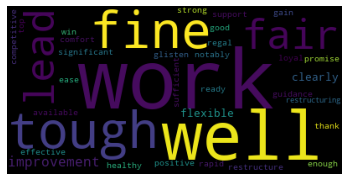

In [51]:
#separating positive words

with open("D:\\PROJECT 2\\positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in dup_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

print(len(pos_words))
print(pos_words)

1926


'negative difficult grapple depressed ignore warning issue warning loss fall fall violate loss negative fall interrupt loss breakup fall sharply overshadow weak damage cry decline fail boycott refuse redundant interrupt fall fall fall drag poor invalid dispute fall loss layoff problem issue warning fall layoff fall loss loss loss loss weak decline loss negative suffer fall redundant frost lie loss loss threaten expire embroil disagreement issue steal rival blame loss weak fall weaken badly lose loss weak uncertain loss decline negative lose loss loss loss redundant fall threat slump poor decline upset loose concern lie decline loss hurt fall decline loose decline issue warning loss loss loss loss struggle slow strike strike damaging disappointment fall loss injury issue warning poor loss lie loss loss decline loss loss unstable warning rival fall fall loss lose strike loss loss slow loss fall fall loss loss downgrade fall fall redundant burden loss leak issue warning burden dark lose f

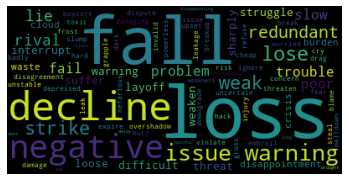

In [52]:
#separating negative words

with open("D:\\PROJECT 2\\negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#positive words wordcloud
neg_words = " ".join([w for w in dup_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

print(len(neg_words))
neg_words

In [53]:
# # majority of words in duplicated records are negative (1704) and only 389 words are positive
# so we can say, out of 507 records most of the records might have negative sentiment

# now we will analyse sentiment of duplicated records by using polarity score concept

In [54]:
# let's find out information from partial duplicated records using polarity score

In [55]:
data_falsedup['p_score'] = data_falsedup['Sentence'].apply(lambda x : sia.polarity_scores(x))
data_falsedup['c_score'] = data_falsedup['p_score'].apply(lambda scores: scores['compound'])
data_falsedup.head()

Sentence Sentiment  \
7    ssh communications security corp stock exchan...  negative   
13                vike line have cancel some service    neutral   
41   dolce gabbana have ask the european union to ...  negative   
57   dilute earning per share eps fall to eur from...   neutral   
66   finnish geosentric s net sale decrease to eur...  negative   

                                              p_score  c_score  
7   {'neg': 0.073, 'neu': 0.852, 'pos': 0.076, 'co...   0.0258  
13  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...  -0.2500  
41  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...  -0.4019  
57  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...   0.2960  
66  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000

In [56]:
def get_sentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'
    
data_falsedup['Sentiment'] = data_falsedup['c_score'].apply(get_sentiment)
data_falsedup.head()

Sentence Sentiment  \
7    ssh communications security corp stock exchan...  positive   
13                vike line have cancel some service   negative   
41   dolce gabbana have ask the european union to ...  negative   
57   dilute earning per share eps fall to eur from...  positive   
66   finnish geosentric s net sale decrease to eur...   neutral   

                                              p_score  c_score  
7   {'neg': 0.073, 'neu': 0.852, 'pos': 0.076, 'co...   0.0258  
13  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...  -0.2500  
41  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...  -0.4019  
57  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...   0.2960  
66  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000

In [57]:
data_falsedup['Sentiment'].value_counts()

positive    436
negative    316
neutral     261
Name: Sentiment, dtype: int64

In [58]:
del data_falsedup['p_score']
del data_falsedup['c_score']

In [59]:
data_falsedup = data_falsedup.drop_duplicates()
data_falsedup.shape

(506, 2)

In [60]:
# droping the partial duplicates and concating original data free from partial duplicates and data_falsedup after performing polarity

In [61]:
data=data.drop_duplicates(subset=['Sentence'],keep = False)
data.shape

(4765, 2)

In [62]:
data = pd.concat([data, data_falsedup], axis=0)
data.shape

(5271, 2)

# Removing stop words

In [63]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [64]:
stop = nltk.download('stopwords')  # Downloading stop words
stop = set(stopwords.words('english'))  # Selecting English stop words
data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentence Sentiment
0  geosolution technology leverage benefon gps so...  positive
1                        esi low bk real possibility  negative
2  last quarter componenta net sale double eur eu...  positive
3  accord finnish russian chamber commerce major ...   neutral
4  swedish buyout firm sell remain percent stake ...   neutral

# 4. Plotting

## a. Bar Plot

<AxesSubplot:>

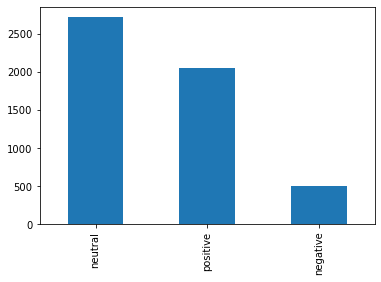

In [65]:
import matplotlib.pyplot as plt
#bar plot
plt.Figure(figsize=(14,16))
t1=(data['Sentiment']).value_counts()
t1
t1.plot(kind="bar")


## b. Pie chart

<AxesSubplot:ylabel='Sentiment'>

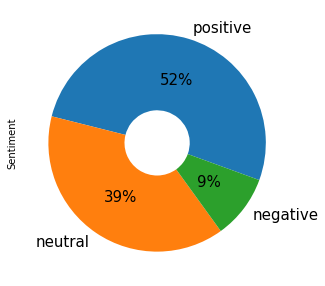

In [66]:
plt.figure(figsize=(5,5))
data.Sentiment.value_counts().plot(kind='pie', labels=['positive', 'neutral', 'negative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

<AxesSubplot:title={'center':'Sentiment'}, ylabel='Sentiment'>

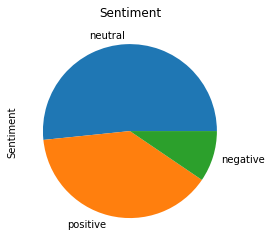

In [67]:
#pie Chart
plt.title("Sentiment")
t1.plot(kind='pie')

# 5.Wordcloud

In [68]:
grouped = data.groupby(data.Sentiment)
data_pos = grouped.get_group("positive")
data_neg = grouped.get_group("negative")
data_neu = grouped.get_group("neutral")

In [69]:
def convert(lst):
    return ''.join(lst).split()

 
pos_lst =  convert(data_pos.Sentence)
neg_lst =  convert(data_neg.Sentence)
neu_lst =  convert(data_neu.Sentence)
#pos_lst

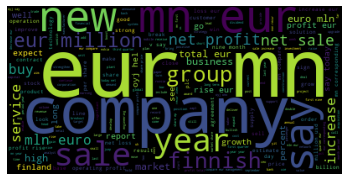

In [70]:
#wordcloud for positive sentiment

wc_pos = " ".join([w for w in pos_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_pos)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)9=
\
 

In [71]:
print(cloud.words_.keys())

dict_keys(['eur mn', 'company', 'mn eur', 'new', 'say', 'year', 'sale', 'finnish', 'group', 'eur million', 'net profit', 'net sale', 'increase', 'service', 'mln euro', 'buy', 'total eur', 'market', 'high', 'euro mln', 'business', 'profit eur', 'say today', 'percent', 'expect', 'rise eur', 'long', 'report', 'see', 'go', 'well', 'oyj hel', 'growth', 'finland', 'operating profit', 'grow', 'good', 'order', 'v say', 'net loss', 'profit rise', 'result', 'share', 'strong', 'mn corresponding', 'loss eur', 'improve', 'per share', 'increase eur', 'sign', 'contract', 'nine month', 'mn compare', 'technology', 'base', 'make', 'operation', 'look', 'customer', 'solution', 'price', 'close', 'product', 'win', 'billion', 'agreement', 'line', 'estimate', 'sell', 'stock', 'million usd', 'break', 'day', 'plc', 'supply', 'third quarter', 'financial', 'volume', 'expand', 'continue', 'bank', 'offer', 'system', 'end', 'time', 'support', 'eur compare', 'mln eur', 'sale increase', 'quarter eur', 'revenue', 'cost

In [72]:
from collections import Counter
word_set = wc_pos
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('eur', 762), ('profit', 316), ('mn', 308), ('net', 220), ('say', 218), ('year', 215), ('company', 207), ('sale', 206), ('million', 172), ('mln', 164), ('increase', 158), ('share', 127), ('quarter', 119), ('euro', 114), ('finnish', 113), ('oyj', 113), ('loss', 106), ('rise', 106), ('first', 101), ('group', 100), ('compare', 99), ('today', 89), ('new', 86), ('total', 86), ('corresponding', 79), ('market', 78), ('period', 76), ('service', 76), ('buy', 75), ('percent', 70), ('long', 70), ('month', 66), ('business', 65), ('high', 64), ('order', 62), ('expect', 61), ('per', 60), ('hel', 60), ('contract', 59), ('operating', 59), ('price', 58), ('solution', 55), ('v', 55), ('also', 54), ('operation', 53), ('grow', 51), ('third', 51), ('sign', 51), ('report', 49), ('finland', 48)]


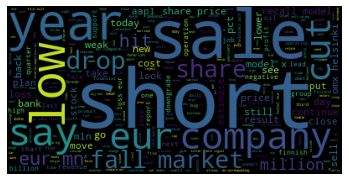

In [73]:
#wordcloud for negative sentiment

wc_neg = " ".join([w for w in neg_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_neg)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [74]:
print(cloud.words_.keys())

dict_keys(['short', 'sale', 'year', 'low', 'say', 'company', 'eur', 'cut', 'drop', 'share', 'fall', 'market', 'eur mn', 'hit', 'million', 'share price', 'lower', 'day', 'price', 'weak', 'today', 'loss', 'look', 'model x', 'continue', 'sell', 'pct', 'recall model', 'go', 'bank', 'take', 'omx helsinki', 'still', 'back', 'new', 'see', 'cost', 'result', 'put', 'plan', 'close', 'aapl', 'stock', 'mln', 'move', 'estimate', 'negative', 'loss eur', 'lose', 'quarter', 'profit', 'chart', 'next', 'downgrade', 'one', 'job', 'finnish', 'operation', 'billion', 'revenue', 'face', 'high', 'lead', 'oil', 'support', 'group', 'report', 'last', 'operating', 'mn compare', 'helsinki pct', 'recall', 'find', 'make', 'big', 'bearish', 'time', 'may', 'two', 'percent', 'staff', 'production', 'unit', 'u', 'due', 'demand', 'first', 'g', 'pay', 'spy', 'daily', 'ftse', 'point', 'debt', 'near', 'break', 'head', 'tesla', 'week', 'product', 'third', 'financial', 'finland', 'expect', 'total eur', 'mn corresponding', 'com

In [75]:
from collections import Counter
word_set = wc_neg
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('eur', 63), ('share', 42), ('short', 35), ('year', 35), ('price', 34), ('sale', 31), ('loss', 30), ('low', 29), ('say', 24), ('sell', 23), ('company', 22), ('cut', 21), ('pct', 21), ('recall', 20), ('drop', 20), ('fall', 19), ('market', 19), ('mn', 19), ('hit', 18), ('million', 18), ('get', 17), ('x', 17), ('lower', 17), ('day', 17), ('I', 17), ('model', 15), ('weak', 15), ('today', 15), ('first', 14), ('look', 14), ('helsinki', 14), ('quarter', 13), ('continue', 13), ('aapl', 13), ('stock', 13), ('go', 12), ('bank', 12), ('take', 12), ('report', 12), ('omx', 12), ('still', 11), ('back', 11), ('see', 11), ('cost', 11), ('result', 11), ('put', 10), ('plan', 10), ('like', 10), ('close', 10), ('mln', 10)]


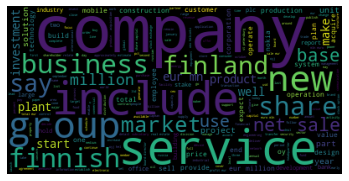

In [76]:
#wordcloud for neutral sentiment

wc_neu = " ".join([w for w in neu_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_neu)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [77]:
print(cloud.words_.keys())

dict_keys(['company', 'service', 'include', 'group', 'new', 'business', 'finnish', 'share', 'finland', 'say', 'market', 'net sale', 'base', 'use', 'million', 'product', 'plant', 'eur mn', 'make', 'well', 'start', 'investment', 'project', 'unit', 'part', 'solution', 'year', 'operation', 'system', 'oy', 'production', 'provide', 'total', 'technology', 'mobile', 'operate', 'one', 'build', 'value', 'sell', 'nokia', 'customer', 'plan', 'construction', 'expect', 'eur million', 'corporation', 'design', 'price', 'end', 'employee', 'acquire', 'industry', 'hold', 'two', 'office', 'plc', 'large', 'stake', 'bank', 'development', 'building', 'report', 'approximately', 'financial', 'management', 'first', 'cover', 'transfer', 'information', 'communication', 'offer', 'shareholder', 'deal', 'electronic', 'sale eur', 'eur', 'contract', 'area', 'order', 'mln euro', 'ceo', 'paper', 'software', 'oyj', 'application', 'number', 'develop', 'fall', 'continue', 'remain', 'take', 'work', 'time', 'global', 'networ

In [78]:
from collections import Counter
word_set = wc_neu
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('company', 381), ('eur', 349), ('share', 224), ('sale', 200), ('service', 160), ('say', 155), ('finland', 151), ('business', 151), ('include', 148), ('group', 143), ('new', 140), ('market', 136), ('million', 134), ('finnish', 121), ('also', 110), ('net', 110), ('mn', 91), ('total', 90), ('base', 90), ('plant', 86), ('product', 83), ('use', 82), ('unit', 80), ('mln', 80), ('euro', 79), ('investment', 78), ('oyj', 76), ('make', 73), ('solution', 73), ('year', 72), ('bank', 72), ('report', 70), ('well', 70), ('mobile', 70), ('production', 69), ('capital', 68), ('operation', 68), ('start', 67), ('helsinki', 66), ('project', 65), ('part', 65), ('stock', 64), ('nokia', 64), ('expect', 64), ('system', 64), ('operate', 63), ('board', 63), ('corporation', 62), ('financial', 61), ('contract', 60)]


In [79]:
#positive words wordcloud for positive sentiment

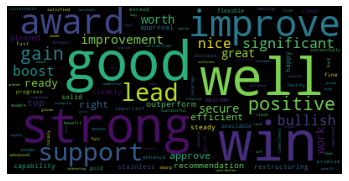

In [80]:
#separating positive words

with open("D:\\PROJECT 2\\positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in pos_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [81]:
print(len(pos_words))
pos_words

6528


'leverage powerful top premier tender welcome restructuring competitive winning lead top clearly improve like gold complement secure gain premier stainless loyal great glad ready positive poise nice good sharp happy right efficient bullish positive successful recovery well gain lead enhance surpass promise boost strong award approve advanced boost well fresh capability bullish enhance dynamic positive good flexible win miracle support like lead improve saint strong secure boost master master innovative efficient boost well support sustainable happy nice succeed well gain well like nice gain enhance capability approve awards significant strong improve recover progress well steady support outperform tough award significant loyalty work significant soft commitment good award win pure pleased confidence secure ready peace successfully win lead boost gain support dynamic support realistic great love improve positive improve win support award good leverage recovery outperform win approval te

In [82]:
print(cloud.words_.keys())

dict_keys(['win', 'good', 'well', 'strong', 'improve', 'award', 'support', 'lead', 'positive', 'gain', 'significant', 'boost', 'bullish', 'nice', 'improvement', 'secure', 'great', 'work', 'worth', 'ready', 'right', 'efficient', 'approve', 'top', 'outperform', 'recommendation', 'pleased', 'restructuring', 'clearly', 'stainless', 'happy', 'capability', 'steady', 'approval', 'solid', 'welcome', 'flexible', 'available', 'clear', 'gold', 'poise', 'enhance', 'promise', 'progress', 'success', 'important', 'hot', 'fine', 'fast', 'exceed', 'leverage', 'tender', 'sharp', 'successful', 'advanced', 'dynamic', 'master', 'sustainable', 'commitment', 'successfully', 'love', 'improved', 'attractive', 'amazing', 'nicely', 'benefit', 'healthy', 'satisfied', 'modern', 'guidance', 'clean', 'fair', 'powerful', 'premier', 'competitive', 'complement', 'loyal', 'recovery', 'surpass', 'innovative', 'tough', 'loyalty', 'soft', 'pure', 'confidence', 'popular', 'trust', 'excellent', 'rapid', 'easy', 'contribution

In [83]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('win', 48), ('good', 46), ('well', 43), ('strong', 38), ('improve', 37), ('award', 33), ('support', 27), ('lead', 26), ('positive', 26), ('gain', 23), ('significant', 19), ('boost', 17), ('like', 16), ('bullish', 16), ('nice', 15), ('improvement', 14), ('secure', 13), ('great', 13), ('work', 13), ('worth', 13), ('ready', 11), ('right', 10), ('efficient', 10), ('approve', 10), ('top', 9), ('outperform', 8), ('recommendation', 8), ('pleased', 7), ('restructuring', 6), ('clearly', 6), ('stainless', 6), ('happy', 6), ('capability', 6), ('steady', 6), ('approval', 6), ('solid', 6), ('welcome', 5), ('flexible', 5), ('available', 5), ('clear', 5), ('gold', 4), ('poise', 4), ('enhance', 4), ('promise', 4), ('progress', 4), ('success', 4), ('important', 4), ('hot', 4), ('fine', 4), ('fast', 4)]


In [84]:
#negative words wordcloud for positive sentiment

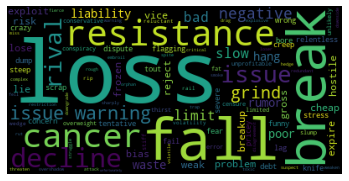

In [85]:
with open("D:\\PROJECT 2\\negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in pos_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [86]:
print(len(neg_words))
neg_words

2219


'loss issue loss dispute crazy resistance weak break issue loss break lie tentative relentless flagging loss break loss scrap loss break break weak loss loss vice dump loss slow rival limit debt fear break loss rival grind negative limit wrong resistance break cancer fall knife break loss gross rumor loss grind stress break decline loss cancer rumor loss fail rival lag exploit bad liability liability rumor grind break concern problem hostile break loss loss steep loss funny cheap bore lose severe expire loss negative rival negative reject pricey break break creep breakup tout poor conspiracy break resistance overweight loss resistance bad censure unprofitable thirst loss break reject hostile loss conservative poor break loss unlikely resistance break stiff resistance loss bad error fall loss limited liability fat waste break break risk break slump break loss cancer volatility reluctant loss fall cancer loss poor loss fall wedge loss rail break hang loss rip bad fall loss loss loss bias

In [87]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('loss', 106), ('fall', 34), ('break', 29), ('issue', 12), ('resistance', 10), ('cancer', 9), ('decline', 8), ('warning', 7), ('rival', 6), ('grind', 5), ('negative', 5), ('slow', 4), ('limit', 4), ('bad', 4), ('rumor', 3), ('liability', 3), ('poor', 3), ('waste', 3), ('hang', 3), ('weak', 2), ('lie', 2), ('vice', 2), ('gross', 2), ('exploit', 2), ('problem', 2), ('hostile', 2), ('cheap', 2), ('lose', 2), ('expire', 2), ('reject', 2), ('breakup', 2), ('risk', 2), ('bias', 2), ('frozen', 2), ('dispute', 1), ('crazy', 1), ('tentative', 1), ('relentless', 1), ('flagging', 1), ('scrap', 1), ('dump', 1), ('debt', 1), ('fear', 1), ('wrong', 1), ('knife', 1), ('stress', 1), ('fail', 1), ('lag', 1), ('concern', 1), ('steep', 1)]


In [88]:
#  positive words wordcloud for negative sentiment

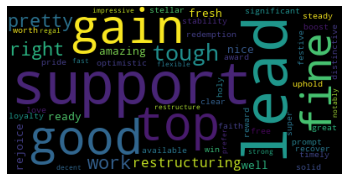

In [89]:
#separating positive words

with open("D:\\PROJECT 2\\positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in neg_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [90]:
print(len(pos_words))
pos_words

717


'ready pretty work like worth lead lead significant top support faith gain good prompt recover lead festive good good right available like redemption clear solid like reward support fine top good like like good love restructuring nice right support right optimistic like like loyalty fine gain fresh nice uphold award amazing support like distinctive lead pride ready pretty timely win great support top support top lead stability well steady gain tough lead boost amazing holy super like stellar free restructuring top rejoice rejoice gain impressive work support like fresh support fine gain decent pretty prefer fast tough strong lead tough work tough well notably regal restructure fine lead flexible restructuring'

In [91]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('like', 10), ('lead', 8), ('support', 8), ('top', 5), ('gain', 5), ('good', 5), ('fine', 4), ('tough', 4), ('pretty', 3), ('work', 3), ('right', 3), ('restructuring', 3), ('ready', 2), ('nice', 2), ('fresh', 2), ('amazing', 2), ('well', 2), ('rejoice', 2), ('worth', 1), ('significant', 1), ('faith', 1), ('prompt', 1), ('recover', 1), ('festive', 1), ('available', 1), ('redemption', 1), ('clear', 1), ('solid', 1), ('reward', 1), ('love', 1), ('optimistic', 1), ('loyalty', 1), ('uphold', 1), ('award', 1), ('distinctive', 1), ('pride', 1), ('timely', 1), ('win', 1), ('great', 1), ('stability', 1), ('steady', 1), ('boost', 1), ('holy', 1), ('super', 1), ('stellar', 1), ('free', 1), ('impressive', 1), ('decent', 1), ('prefer', 1), ('fast', 1)]


In [92]:
# negative words wordcloud for negative sentiment

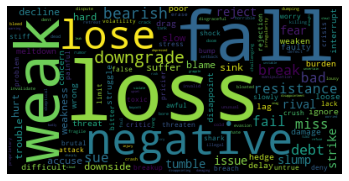

In [93]:
with open("D:\\PROJECT 2\\negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in neg_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [94]:
print(len(neg_words))
neg_words

2129


'disappoint problem brutal lose lag crisis hard weak slump rejection fall breach issue weaken resistance threaten fall sink struggle stress sue fall toxic fall bearish shark weak debt hedge downgrade miss miss sue untrue damage bad issue tumble worry hedge loss crush bad wrong ignore slump debt fear shock accuse tumble slowly fall awful weak weak drag blame rival stiff fear loss break downgrade downgrade weak fall limit breakup miss loss weak sue break bump decline resistance fall fail critic painful downside pricier faulty sue resistance disappoint bitter lack reject weak downgrade attack delay weak false deny volatility erase manipulation faulty fall evasion meltdown sink fail weak downgrade sad rumor retreat unusual accuse hurt fall slow cold dent break tank irregularity bearish lag dead bloated disgraceful fall downgrade reject bearish bad blame rival issue sink threat lose debt fall invalidate fall bearish hurt weak doom dumping fall bearish crash lose downgrade reject sue hang fa

In [95]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('loss', 30), ('fall', 19), ('weak', 15), ('negative', 10), ('lose', 9), ('downgrade', 9), ('bearish', 7), ('debt', 6), ('break', 6), ('resistance', 5), ('sue', 5), ('miss', 5), ('bad', 5), ('fail', 5), ('slump', 4), ('issue', 4), ('tumble', 4), ('fear', 4), ('rival', 4), ('reject', 4), ('strike', 4), ('hard', 3), ('sink', 3), ('accuse', 3), ('blame', 3), ('decline', 3), ('downside', 3), ('hurt', 3), ('slow', 3), ('weakness', 3), ('suffer', 3), ('trouble', 3), ('disappoint', 2), ('lag', 2), ('weaken', 2), ('struggle', 2), ('hedge', 2), ('damage', 2), ('wrong', 2), ('ignore', 2), ('drag', 2), ('faulty', 2), ('delay', 2), ('meltdown', 2), ('threat', 2), ('concern', 2), ('interrupt', 2), ('loose', 2), ('difficult', 2), ('burden', 2)]


In [96]:
#positive words wordcloud for neutral sentiment

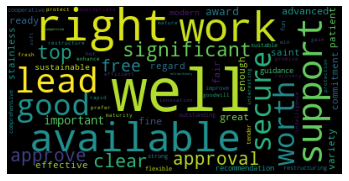

In [97]:
#separating positive words

with open("D:\\PROJECT 2\\positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in neu_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [98]:
print(len(pos_words))
pos_words

5291


'right soft fresh efficient work lead recommendation appropriate delight fresh commitment right right favorable dominate clear perfect gain good great good secure ready lead work lead thank fair right available clear worth significant appeal well guidance flexibility important support regard hot saint well right like well capable genius sustainability work support support lean lean boost available approval intriguing support clear right well lead effective available restructuring stainless good work approve approval guidance celebrate diligence effective encourage available award win free free worth effective patient outstanding master covenant regard fine lead intelligence cornerstone award approval easy lead assurance protect recommend secure fortitude support clarity well right colorful well advantage win impressive benefit secure versatile beneficiary important strong lead secure skilled right recovery support regard appropriate maturity support ready tender secure solid well signi

In [99]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('well', 70), ('right', 36), ('work', 31), ('available', 29), ('support', 23), ('lead', 22), ('good', 17), ('secure', 15), ('worth', 15), ('significant', 11), ('top', 11), ('clear', 10), ('approval', 10), ('approve', 10), ('like', 9), ('free', 9), ('important', 8), ('award', 7), ('great', 6), ('ready', 6), ('fair', 6), ('fine', 6), ('advanced', 6), ('commitment', 5), ('regard', 5), ('saint', 5), ('effective', 5), ('stainless', 5), ('patient', 5), ('variety', 5), ('enough', 5), ('sustainable', 5), ('modern', 5), ('recommendation', 4), ('guidance', 4), ('restructuring', 4), ('outstanding', 4), ('strong', 4), ('tender', 4), ('cooperative', 4), ('flexible', 4), ('improve', 4), ('fun', 4), ('suitable', 4), ('comprehensive', 4), ('soft', 3), ('fresh', 3), ('efficient', 3), ('appropriate', 3), ('gain', 3)]


In [100]:
#negative words wordcloud for neutral sentiment

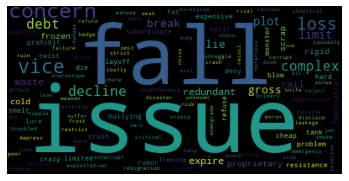

In [101]:
with open("D:\\PROJECT 2\\negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in neu_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [102]:
print(len(neg_words))
neg_words

2175


'gross rumor scrap debt rail vice complex passive cheap renounce casualty split complex die die issue lose concern struggle waste restrict frozen gross loss concern issue exploitation weak issue issue vice fall vice issue problem deny fall decline rigid limit issue loss damage vice proprietary grate concern issue waste loss scrap loss issue rival absentee issue vice troubled issue rail fall concern evil degeneration loss issue attack fall smelt smelt issue break prohibit concern gross punch concern limited break problem excuse fat issue fall monster prohibit rumor fat expire concern issue loss proprietary vice lie stereotype chore issue tank reject plot rail concern concern suffer issue cold skeptical debt emergency corrupt loss crazy leak issue interrupt concern disaster vice frost interference noise concern loss issue disclaim liability break vice unknown loss issue limit waste hard fall concern doom resignation scrap debt expire concern poor weaken refuse plot omit shake debt lure d

In [103]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('issue', 42), ('fall', 32), ('concern', 20), ('vice', 17), ('loss', 13), ('debt', 8), ('complex', 8), ('decline', 8), ('limit', 6), ('plot', 6), ('gross', 5), ('break', 5), ('lie', 5), ('rail', 4), ('waste', 4), ('expire', 4), ('redundant', 4), ('scrap', 3), ('frozen', 3), ('rigid', 3), ('proprietary', 3), ('cold', 3), ('rumor', 2), ('cheap', 2), ('split', 2), ('die', 2), ('problem', 2), ('deny', 2), ('smelt', 2), ('prohibit', 2), ('limited', 2), ('fat', 2), ('monster', 2), ('tank', 2), ('crazy', 2), ('hard', 2), ('refuse', 2), ('lure', 2), ('fabrication', 2), ('blow', 2), ('subordinate', 2), ('crush', 2), ('expensive', 2), ('twist', 2), ('bullying', 2), ('resistance', 2), ('layoff', 2), ('passive', 1), ('renounce', 1), ('casualty', 1)]


# 6.Feature Extraction

In [104]:
# #export dataframe to excel
# from sklearn.feature_extraction.text import CountVectorizer
# DataFrame_name = pd.DataFrame(CountVectorizer.get_feature_names_out(self=))

# #pip install openpyxl
# writer = pd.ExcelWriter('converted-to-excel.xlsx')
# DataFrame_name.to_excel(writer)
# writer.save()

# Count Vectorizer(Unigram)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x1 = vectorizer.fit_transform(data['Sentence'])

In [106]:
print(vectorizer.get_feature_names_out()[0:100])

['aa' 'aal' 'aaland' 'aalto' 'aaltonen' 'aapl' 'aaron' 'aava' 'aazhang'
 'ab' 'abandon' 'abb' 'abbott' 'abbv' 'abc' 'aberdeen' 'aberration'
 'abidjan' 'ability' 'able' 'abloy' 'abn' 'aboavista' 'abov' 'abp'
 'abramov' 'abramovich' 'abroad' 'absentee' 'absolut' 'ac' 'aca' 'acad'
 'academic' 'acanb' 'acando' 'accelerate' 'accept' 'access' 'accessory'
 'accident' 'accommodate' 'accommodation' 'accomplish' 'accord'
 'accordance' 'accordingly' 'account' 'accountant' 'accounting' 'accrue'
 'accumulate' 'accumulation' 'accuse' 'ace' 'acerta' 'acg' 'achieve'
 'achievement' 'acid' 'ackman' 'acknowledge' 'acnielsen' 'acom' 'acquire'
 'acquirer' 'acquisition' 'acquit' 'across' 'acs' 'act' 'actelion'
 'action' 'activate' 'activation' 'active' 'actively' 'activeness'
 'activision' 'activity' 'actor' 'actual' 'actually' 'ad' 'adac' 'adak'
 'adam' 'adanac' 'adate' 'adbe' 'add' 'addiction' 'addition' 'additional'
 'additionally' 'address' 'addus' 'ade' 'adequacy' 'adidas']


In [107]:
x1.shape

(5271, 8158)

In [108]:
pd.DataFrame(x1.toarray()) 

0     1     2     3     4     5     6     7     8     9     ...  8148  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5266     0     0     0     0     0     0     0     0     0     0  ...     0   
5267     0     0     0     0     0     0     0     0     0     0  ...     0   
5268     0     0     0     0     0     0     0     0     0     0  ...     0   
5269     0     0     0     0     0     0     0     0     0     0  ...     0   
5270     0     0     0     0     0     0     0     0     0     0  ...     0   

      8149  8150  8151  8152  8153  8154  8155  8156  8157  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5266     0     0     0     0     0     0     0     0     0  
5267     0     0     0     0     0     0     0     0     0  
5268     0     0     0     0     0     0     0     0     0  
5269     0     0     0     0     0     0     0     0     0  
5270     0     0     0     0     0     0     0     0     0  

[5271 rows x 8158 columns]

In [109]:
def plot_top_ngrams_barchart(text, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

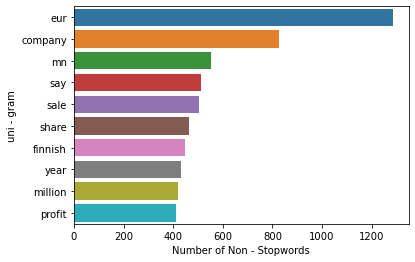

In [110]:
plot_top_ngrams_barchart(data['Sentence'],1)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('uni - gram')
plt.show()

# count vectorizer(bigram)

In [111]:
# #export dataframe to excel

# #pip install openpyxl
# writer = pd.ExcelWriter('converted-to-excel.xlsx')
# DataFrame_name.to_excel(writer)
# writer.save()

In [112]:
vectorizer = CountVectorizer(ngram_range=(2,2))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x2 = vectorizer.fit_transform(data['Sentence'])

In [113]:
x2.shape

(5271, 38669)

In [114]:
pd.DataFrame(x2.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  38659  38660  38661  38662  38663  38664  38665  38666  38667  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      38668  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 38669 columns]

In [115]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

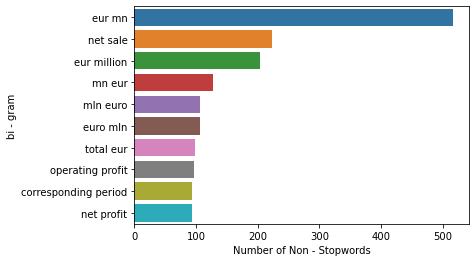

In [116]:
plot_top_ngrams_barchart(data['Sentence'],2)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('bi - gram')
plt.show()

# count vectorizer(Trigram)

In [117]:
vectorizer = CountVectorizer(ngram_range=(3,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x3 = vectorizer.fit_transform(data['Sentence'])

In [118]:
x3.shape

(5271, 42397)

In [119]:
pd.DataFrame(x3.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  42387  42388  42389  42390  42391  42392  42393  42394  42395  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      42396  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 42397 columns]

In [120]:
def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

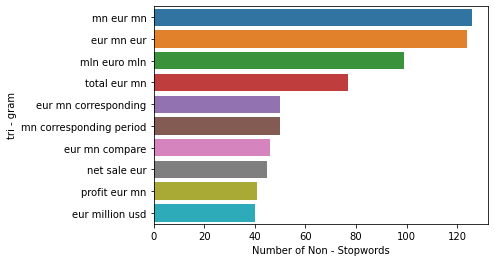

In [121]:
plot_top_ngrams_barchart(data['Sentence'],3)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('tri - gram')
plt.show()

# CountVectorizer(Unigram+Trigram)

In [122]:
vectorizer = CountVectorizer(ngram_range=(1,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x4 = vectorizer.fit_transform(data['Sentence'])

In [123]:
x4.shape

(5271, 89224)

In [124]:
pd.DataFrame(x4.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  89214  89215  89216  89217  89218  89219  89220  89221  89222  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      89223  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 89224 columns]

# TF-IDF unigram

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Sentence'])

In [126]:
tfidf.shape

(5271, 8158)

In [127]:
pd.DataFrame(tfidf.toarray())

0     1     2     3     4     5     6     7     8     9     ...  8148  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5266   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5267   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5268   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5269   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5270   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      8149  8150  8151  8152  8153  8154  8155  8156  8157  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5266   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5267   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5268   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5269   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5270   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5271 rows x 8158 columns]

# TF-IDF bigram

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [129]:
tfidf.shape

(5271, 38669)

In [130]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  38659  38660  38661  38662  38663  38664  38665  38666  38667  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      38668  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 38669 columns]

# TfIDF Trigram

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,3))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [132]:
tfidf.shape

(5271, 42397)

In [133]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  42387  42388  42389  42390  42391  42392  42393  42394  42395  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      42396  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 42397 columns]

# TFIDF(Unigram+Trigram)

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [135]:
tfidf.shape

(5271, 89224)

In [136]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  89214  89215  89216  89217  89218  89219  89220  89221  89222  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      89223  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 89224 columns]

# 7.Model Building

In [137]:
data

Sentence Sentiment
0     geosolution technology leverage benefon gps so...  positive
1                           esi low bk real possibility  negative
2     last quarter componenta net sale double eur eu...  positive
3     accord finnish russian chamber commerce major ...   neutral
4     swedish buyout firm sell remain percent stake ...   neutral
...                                                 ...       ...
5422  finnish electronics contract manufacturer scan...   neutral
5448  finnish medium group talentum issue profit war...  positive
5472  large restructuring plan italy negotiation job...  negative
5550  negotiation result reduction people regular em...   neutral
5570    last year million passenger fly airline percent   neutral

[5271 rows x 2 columns]

# 7.1 Using CountVectorizer

In [138]:
#Creating Bag of Words

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [140]:
cv= CountVectorizer(ngram_range=(1, 3), max_features=10000)
X = cv.fit_transform(data['Sentence']).toarray()

In [141]:
data['Sentiment'].replace({'positive':1,'negative':-1,'neutral':0},inplace=True)

In [142]:
y = data['Sentiment']
y

0       1
1      -1
2       1
3       0
4       0
       ..
5422    0
5448    1
5472   -1
5550    0
5570    0
Name: Sentiment, Length: 5271, dtype: int64

In [143]:
#Splitting Data Set in Train and Test

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3953, 10000)
(3953,)
(1318, 10000)
(1318,)


# 7.1.1 Gaussian Naive Bayes Model

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [146]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [147]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [148]:
#Accuracy of GaussianNB Algorithm
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.6646433990895296


In [149]:
#Classification Report
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.45      0.37        89
           0       0.68      0.80      0.73       594
           1       0.74      0.57      0.65       635

    accuracy                           0.66      1318
   macro avg       0.58      0.61      0.58      1318
weighted avg       0.68      0.66      0.67      1318



In [150]:
#Making the Confusion Matrix

In [151]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 40,  28,  61],
       [ 16, 473, 211],
       [ 33,  93, 363]], dtype=int64)

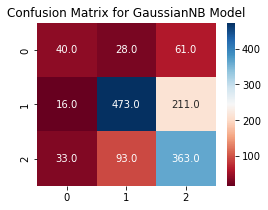

In [152]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 7.1.2 SVM

In [153]:
from sklearn.svm import SVC

In [154]:
classifier = SVC()

In [155]:
classifier.fit(X_train,y_train)

SVC()

In [156]:
y_pred  = classifier.predict(X_test)

In [157]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [158]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.7625189681335357


In [159]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.16      0.91      0.26        22
           0       0.94      0.76      0.84       870
           1       0.67      0.77      0.71       426

    accuracy                           0.76      1318
   macro avg       0.59      0.81      0.61      1318
weighted avg       0.84      0.76      0.79      1318



In [160]:
CM_SVM = confusion_matrix(y_test, y_pred) 
CM_SVM

array([[ 20,  51,  58],
       [  1, 658,  41],
       [  1, 161, 327]], dtype=int64)

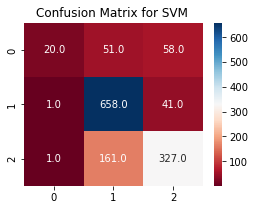

In [161]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# 7.1.3 LightGBM Classifier Model

In [162]:
from lightgbm import LGBMClassifier

In [163]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [164]:
y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [165]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7549317147192717


In [166]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.66      0.42        61
           0       0.87      0.78      0.82       786
           1       0.71      0.73      0.72       471

    accuracy                           0.75      1318
   macro avg       0.63      0.72      0.65      1318
weighted avg       0.79      0.75      0.77      1318



In [167]:
#Making the Confusion Matrix

In [168]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 40,  43,  46],
       [ 10, 610,  80],
       [ 11, 133, 345]], dtype=int64)

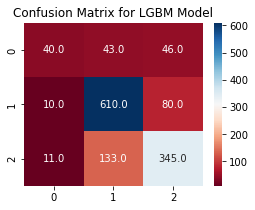

In [169]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# 7.1.4 Random Forest Classifier Model

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [172]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [173]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.7716236722306525


In [174]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.69      0.43        58
           0       0.92      0.77      0.84       836
           1       0.67      0.78      0.72       424

    accuracy                           0.77      1318
   macro avg       0.64      0.75      0.66      1318
weighted avg       0.82      0.77      0.79      1318



In [175]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[ 40,  41,  48],
       [  7, 647,  46],
       [ 11, 148, 330]], dtype=int64)

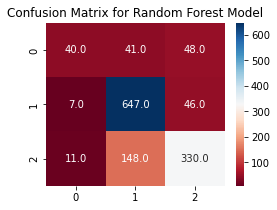

In [176]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [177]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac],
        ['LightGBM Classifier ',Acc_LGBM],['Random Forest Classifier',Acc_RFC]]

In [178]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0      Gaussian Naive Bayes  0.664643
1    Support Vector Machine  0.762519
2      LightGBM Classifier   0.754932
3  Random Forest Classifier  0.771624

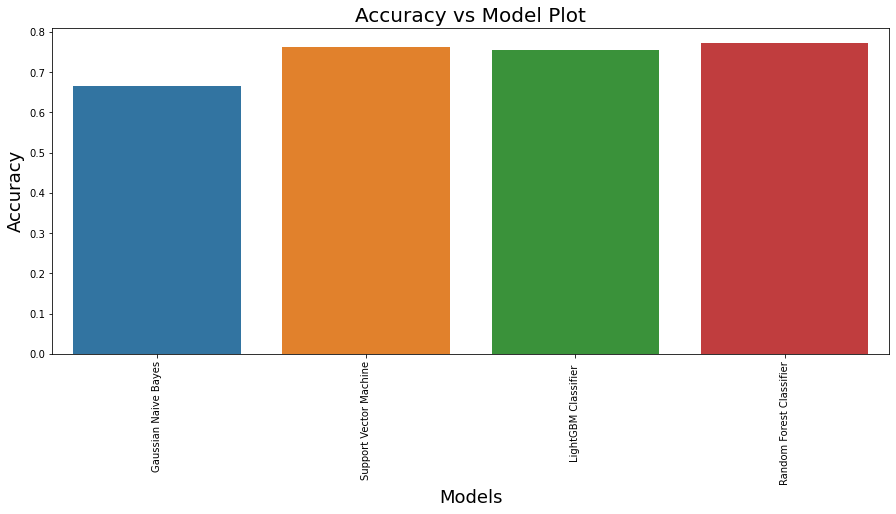

In [179]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

# 7.2 Using TF-IDF

In [180]:
#Creating Bag of Words

In [328]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [329]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X = tfidf.fit_transform(data['Sentence']).toarray()

In [330]:
data['Sentiment'].replace({'positive':1,'negative':-1,'neutral':0},inplace=True)

In [331]:
y = data['Sentiment']

In [332]:
y

0       1
1      -1
2       1
3       0
4       0
       ..
5422    0
5448    1
5472   -1
5550    0
5570    0
Name: Sentiment, Length: 5271, dtype: int64

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3953, 10000)
(3953,)
(1318, 10000)
(1318,)


# 7.2.1 Gaussian Naive Bayes Model

In [187]:
from sklearn.naive_bayes import GaussianNB

In [188]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [189]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [190]:
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.6631259484066768


In [191]:
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.49      0.38        82
           0       0.70      0.77      0.73       634
           1       0.71      0.58      0.64       602

    accuracy                           0.66      1318
   macro avg       0.57      0.61      0.58      1318
weighted avg       0.68      0.66      0.67      1318



In [192]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 40,  33,  56],
       [ 14, 487, 199],
       [ 28, 114, 347]], dtype=int64)

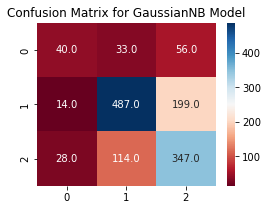

In [193]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 7.2.2 SVM

In [194]:
from sklearn.svm import SVC

In [195]:
classifier = SVC()

In [196]:
classifier.fit(X_train,y_train)

SVC()

In [197]:
y_pred  = classifier.predict(X_test)

In [198]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [199]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.7640364188163885


In [200]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.16      0.91      0.28        23
           0       0.93      0.77      0.84       847
           1       0.69      0.75      0.72       448

    accuracy                           0.76      1318
   macro avg       0.59      0.81      0.61      1318
weighted avg       0.83      0.76      0.79      1318



In [201]:
CM_SVM = confusion_matrix(y_test, y_pred) 
CM_SVM

array([[ 21,  49,  59],
       [  1, 648,  51],
       [  1, 150, 338]], dtype=int64)

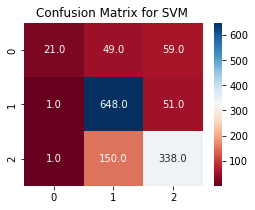

In [202]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# 7.2.3 LightGBM Classifier Model

In [203]:
from lightgbm import LGBMClassifier

In [204]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [205]:
y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [206]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7503793626707133


In [207]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.35      0.62      0.45        72
           0       0.87      0.77      0.82       787
           1       0.69      0.73      0.71       459

    accuracy                           0.75      1318
   macro avg       0.63      0.71      0.66      1318
weighted avg       0.78      0.75      0.76      1318



In [208]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 45,  41,  43],
       [ 12, 608,  80],
       [ 15, 138, 336]], dtype=int64)

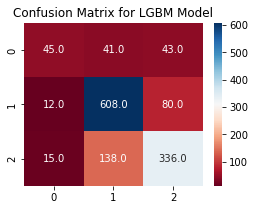

In [209]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# 7.2.4 Random Forest Classifier Model

In [334]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [336]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [337]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.7723823975720789


In [338]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.29      0.65      0.40        57
           0       0.93      0.77      0.84       848
           1       0.67      0.80      0.73       413

    accuracy                           0.77      1318
   macro avg       0.63      0.74      0.66      1318
weighted avg       0.82      0.77      0.79      1318



In [339]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[ 37,  48,  44],
       [  8, 652,  40],
       [ 12, 148, 329]], dtype=int64)

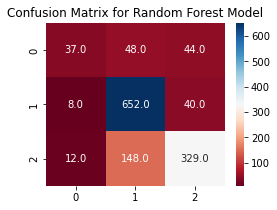

In [340]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [217]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac],
        ['LightGBM Classifier ',Acc_LGBM],['Random Forest Classifier',Acc_RFC]]

In [218]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0      Gaussian Naive Bayes  0.663126
1    Support Vector Machine  0.764036
2      LightGBM Classifier   0.750379
3  Random Forest Classifier  0.772382

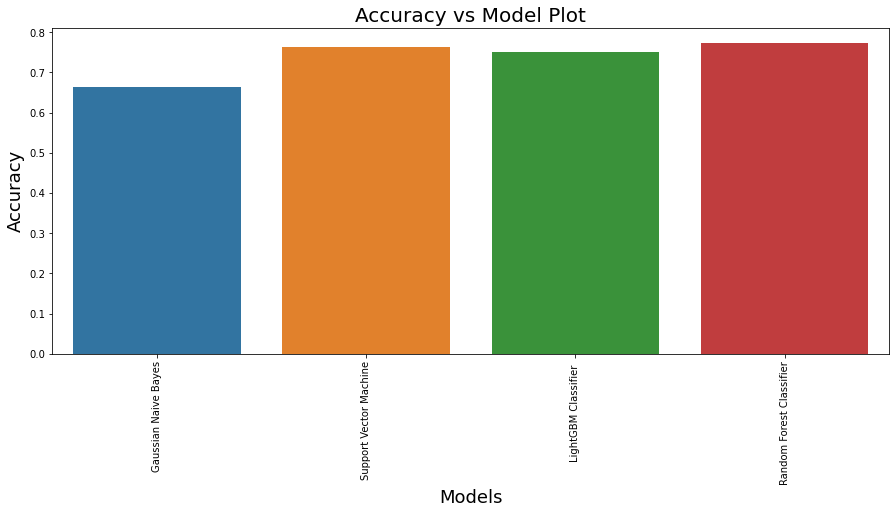

In [219]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

# 7.3 Using Word2Vec

In [277]:
!pip install gensim==4.2.0


In [278]:
import gensim, logging
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import string
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [279]:
#using pretrianed word vectors

In [280]:
import gensim.downloader as api
#print(list(gensim.downloader.info()['models'].keys()))

In [281]:
wv = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


2023-03-10 15:43:56,610 : INFO : glove-wiki-gigaword-100 downloaded
2023-03-10 15:43:56,634 : INFO : loading projection weights from C:\Users\LENOVO/gensim-data\glove-wiki-gigaword-100\glove-wiki-gigaword-100.gz
2023-03-10 15:44:26,198 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 100) matrix of type float32 from C:\\Users\\LENOVO/gensim-data\\glove-wiki-gigaword-100\\glove-wiki-gigaword-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-03-10T15:44:26.198998', 'gensim': '4.2.0', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'load_word2vec_format'}


In [282]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [283]:
wv['fall']

array([ 0.3264  ,  0.55822 ,  0.25533 , -0.10814 ,  0.04654 , -0.46577 ,
       -0.13963 ,  0.15362 , -0.23483 , -0.42804 ,  0.037924,  0.22895 ,
        0.18672 ,  0.23734 ,  0.34996 ,  0.037288, -0.46827 ,  0.15487 ,
       -0.16487 ,  0.11753 ,  0.30809 , -0.25441 ,  0.30979 ,  0.8051  ,
       -0.09219 , -0.062635, -0.38575 , -0.54978 ,  0.3019  , -0.54258 ,
        0.19739 , -0.29    ,  0.092703, -0.48055 , -0.48191 ,  0.72779 ,
        0.22876 , -0.45603 ,  0.037786, -0.32571 , -0.42623 , -0.058946,
       -0.52196 ,  0.18801 ,  0.14141 , -0.20073 ,  0.27084 , -0.026134,
        0.13288 , -1.4764  , -0.056972, -0.32662 ,  0.30494 ,  0.76331 ,
        0.16788 , -2.356   , -0.37616 , -0.011489,  1.9827  ,  0.36153 ,
       -0.22095 ,  1.0825  , -0.67676 ,  0.096369,  0.48564 ,  0.20256 ,
        0.16667 , -0.35918 ,  0.13848 ,  0.096536,  0.13312 , -0.069298,
       -0.69095 ,  0.35564 , -0.50851 , -0.3494  , -0.33562 ,  0.45363 ,
       -0.28949 ,  0.032191,  0.17248 ,  0.1475  , 

In [284]:
len(wv['fall'])

100

In [285]:
#finding most similar words to fall (fall is available in out corpus)
wv.most_similar(positive="fall")

[('rise', 0.8019400238990784),
 ('drop', 0.7939486503601074),
 ('coming', 0.7773260474205017),
 ('beginning', 0.7731252312660217),
 ('months', 0.763860821723938),
 ('decline', 0.760334849357605),
 ('year', 0.7567465305328369),
 ('falling', 0.7503718137741089),
 ('end', 0.7451515793800354),
 ('next', 0.7392168641090393)]

In [286]:
data.head()

Sentence  Sentiment  \
0  geosolution technology leverage benefon gps so...          1   
1                        esi low bk real possibility         -1   
2  last quarter componenta net sale double eur eu...          1   
3  accord finnish russian chamber commerce major ...          0   
4  swedish buyout firm sell remain percent stake ...          0   

                                  tokenized_sentence  \
0  [geosolution, technology, leverage, benefon, g...   
1                  [esi, low, bk, real, possibility]   
2  [last, quarter, componenta, net, sale, double,...   
3  [accord, finnish, russian, chamber, commerce, ...   
4  [swedish, buyout, firm, sell, remain, percent,...   

                                    tokenized_vector  
0  [0.14563710233196617, 0.11059135217219591, -0....  
1  [0.01645450045665105, 0.41426167885462445, -0....  
2  [0.1774371059378609, 0.5762465000152588, -0.31...  
3  [-0.1859301676352819, 0.14908500636617342, -0....  
4  [-0.2184295566927176, 0.476846195012331, -0.19...

In [287]:
#converting each sentence into vectors

In [288]:
def smt_vec(smt):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in smt:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [289]:
smt_vec('i am happy')

array([-0.18242767,  0.35367246,  0.01968191,  0.10399222, -0.35295445,
        0.08505222,  0.37160055,  0.29172889, -0.40397556,  0.26432555,
        0.5950522 , -0.18892983, -0.09718833,  0.13998775,  0.19201633,
       -0.22855811, -0.14154889,  0.11521066, -0.21008178,  0.09476022,
        0.55220356,  0.147815  , -0.03139667,  0.41584866,  0.22108444,
        0.28051444,  0.20043332, -0.21474666,  0.02703332, -0.31527889,
        0.18204444,  0.67766222,  0.09727756,  0.07389223,  0.29935001,
        0.16793945,  0.37635643,  0.31427778,  0.35322445,  0.142665  ,
        0.17854264, -0.41472422,  0.16024933, -0.35294489, -0.09683421,
        0.07253214, -0.22078889,  0.15703704, -0.02863712, -0.46626001,
       -0.25449612, -0.04111011,  0.36263556,  0.29946909, -0.42683888,
       -1.92347776, -0.03614756,  0.29554445,  1.17495225,  0.28850222,
       -0.20621666,  0.04643377, -0.64548112, -0.18874023,  0.83012332,
        0.32586567,  0.44918999,  0.32653333,  0.45325887,  0.19

In [290]:
data1=data

In [291]:
data1['tokenized_sentence'] = data1['Sentence'].apply(lambda x: x.split()) # tokenizing 
data1['tokenized_vector'] = data1['tokenized_sentence'].apply(smt_vec)
data1.head()

Sentence  Sentiment  \
0  geosolution technology leverage benefon gps so...          1   
1                        esi low bk real possibility         -1   
2  last quarter componenta net sale double eur eu...          1   
3  accord finnish russian chamber commerce major ...          0   
4  swedish buyout firm sell remain percent stake ...          0   

                                  tokenized_sentence  \
0  [geosolution, technology, leverage, benefon, g...   
1                  [esi, low, bk, real, possibility]   
2  [last, quarter, componenta, net, sale, double,...   
3  [accord, finnish, russian, chamber, commerce, ...   
4  [swedish, buyout, firm, sell, remain, percent,...   

                                    tokenized_vector  
0  [-0.20677559925243258, 0.19657924873754382, 0....  
1  [0.020087001224358875, 0.04041383105019728, 0....  
2  [0.2062575845513493, 0.19627904649823905, 0.23...  
3  [-0.05038416261474291, 0.07019666582345963, 0....  
4  [0.1620405949652195, 0.17280377040927608, 0.04...

In [292]:
data1['tokenized_vector'][0]

array([-2.06775599e-01,  1.96579249e-01,  2.20487497e-01,  1.73387501e-01,
        2.60104545e-01, -4.38221903e-01, -5.47329523e-02, -1.43582546e-01,
        1.33707852e-01,  3.32373002e-01,  1.74255402e-01, -3.95653048e-01,
        1.55958818e-01, -3.49273586e-01,  1.54311353e-01, -1.44889100e-01,
        3.97790548e-01,  6.43083011e-02, -1.71806168e-01,  1.62151205e-01,
       -1.66095296e-01, -1.67276340e-01,  2.51547896e-01, -8.33249472e-02,
       -1.15864075e-01, -1.44935541e-01,  1.64960353e-01,  1.76639492e-02,
       -3.32120602e-01,  1.62473590e-01, -8.36475950e-02,  5.74865095e-01,
       -2.99223204e-01,  5.96175531e-02,  4.07925499e-01,  5.55306001e-02,
       -1.37164434e-03, -9.33149513e-03,  6.42468989e-02, -2.51771187e-01,
       -1.51586694e-01, -2.99788852e-01, -4.52359682e-03, -1.29678305e-01,
       -1.38821100e-01, -3.20415525e-02,  1.09573798e-01,  6.09613501e-02,
        3.36309541e-02, -2.02523302e-01, -3.69985297e-02,  2.06302099e-01,
        2.96310510e-02,  

In [293]:
x = data['tokenized_vector'].to_list()
y = data['Sentiment'].to_list()

In [294]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y)

# 7.3.1 Gaussian Naive Bayes Model

In [295]:
from sklearn.naive_bayes import GaussianNB

In [296]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [297]:
y_pred_GNB = GNB.predict(x_test)
y_pred_GNB

array([ 1,  0,  0, ..., -1,  0,  0])

In [298]:
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.576303317535545


In [299]:
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.53      0.27      0.35       200
           0       0.71      0.69      0.70       566
           1       0.41      0.58      0.48       289

    accuracy                           0.58      1055
   macro avg       0.55      0.51      0.51      1055
weighted avg       0.59      0.58      0.57      1055



In [300]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 53,  28,  19],
       [ 54, 388, 103],
       [ 93, 150, 167]], dtype=int64)

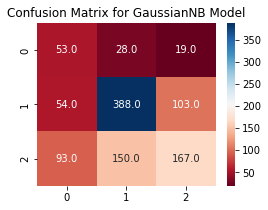

In [301]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 7.3.2 SVM

In [302]:
from sklearn.svm import SVC

In [303]:
classifier = SVC()

In [304]:
classifier.fit(x_train,y_train)

SVC()

In [305]:
y_pred  = classifier.predict(x_test)

In [306]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [307]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.7127962085308057


In [308]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.13      0.52      0.21        25
           0       0.87      0.74      0.80       645
           1       0.64      0.69      0.66       385

    accuracy                           0.71      1055
   macro avg       0.55      0.65      0.56      1055
weighted avg       0.77      0.71      0.74      1055



In [309]:
CM_SVM = confusion_matrix(y_test, y_pred) 
CM_SVM

array([[ 13,  32,  55],
       [  4, 475,  66],
       [  8, 138, 264]], dtype=int64)

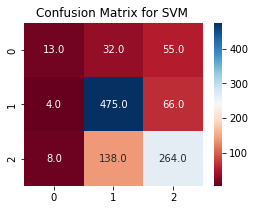

In [310]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# 7.3.3 LightGBM Classifier Model

In [311]:
from lightgbm import LGBMClassifier

In [312]:
LGBM = LGBMClassifier()
LGBM.fit(x_train, y_train)

LGBMClassifier()

In [313]:
y_pred_LGBM = LGBM.predict(x_test)
y_pred_LGBM

array([0, 0, 0, ..., 1, 0, 0])

In [314]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7270142180094786


In [315]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.14      0.48      0.22        29
           0       0.88      0.75      0.81       645
           1       0.66      0.71      0.69       381

    accuracy                           0.73      1055
   macro avg       0.56      0.65      0.57      1055
weighted avg       0.78      0.73      0.75      1055



In [316]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 14,  34,  52],
       [  7, 481,  57],
       [  8, 130, 272]], dtype=int64)

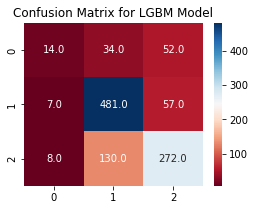

In [317]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# 7.3.4 Random Forest Classifier Model

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [320]:
y_pred_RFC = RFC.predict(x_test)
y_pred_RFC

array([0, 0, 0, ..., 1, 0, 0])

In [321]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.6862559241706161


In [322]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.04      0.57      0.07         7
           0       0.91      0.69      0.78       716
           1       0.55      0.68      0.61       332

    accuracy                           0.69      1055
   macro avg       0.50      0.65      0.49      1055
weighted avg       0.79      0.69      0.72      1055



In [323]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[  4,  38,  58],
       [  3, 494,  48],
       [  0, 184, 226]], dtype=int64)

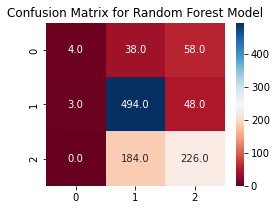

In [324]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [325]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac],
        ['LightGBM Classifier ',Acc_LGBM],['Random Forest Classifier',Acc_RFC]]

In [326]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0      Gaussian Naive Bayes  0.576303
1    Support Vector Machine  0.712796
2      LightGBM Classifier   0.727014
3  Random Forest Classifier  0.686256

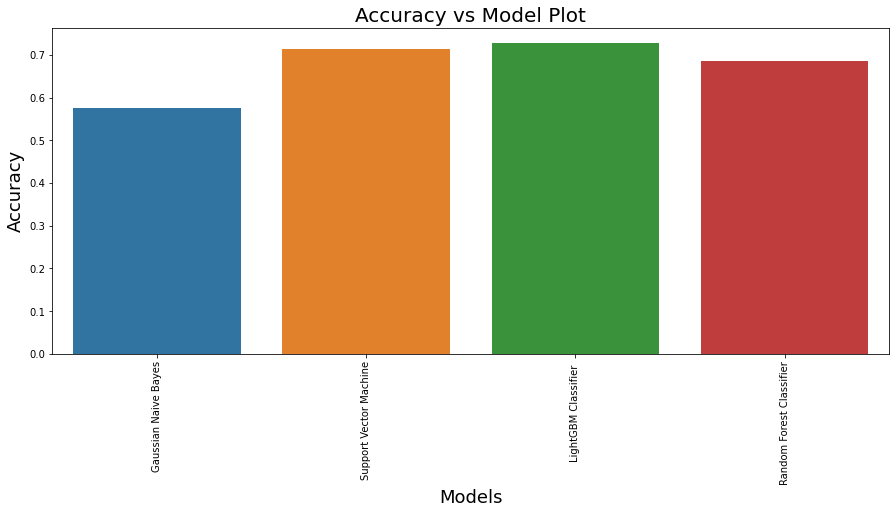

In [327]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

# 7.4 MODEL SAVING

In [341]:
import pickle

In [342]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [343]:
pickle.dump(RFC, open('RFC.pkl', 'wb'))

In [344]:
pickled_model = pickle.load(open('RFC.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [345]:
# saving data into csv for model buiding pov
data.to_csv('data.csv')